In [1]:
##Install Afinn
!pip install afinn

     |████████████████████████████████| 52 kB 70 kB/s  eta 0:00:01
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=4668230d4e7fd4c7976c8a3677fd213221562f7b3290ff788d785e899ce61702
  Stored in directory: /home/mona/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [2]:
### Importing necessary libraries

from afinn import Afinn
import pandas as pd

# Afinn github link

https://github.com/fnielsen/afinn/tree/master/afinn/data

In [3]:
## Instantiate afinn (used to create object instance from a class)

afn = Afinn()

In [4]:
## Creating list sentences

news_df = ['i hate flowers', 'he is kind and smart', 
           'we are kind to good people', 'it is raining today']

In [5]:
## Compute scores (polarity) and labels

scores = [afn.score(article) for article in news_df]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]

In [6]:
## Dataframe creation
df = pd.DataFrame()
df['topic'] =  news_df
df['scores'] = scores
df['sentiments'] = sentiment
print(df)

                        topic  scores sentiments
0              i hate flowers    -3.0   negative
1        he is kind and smart     3.0   positive
2  we are kind to good people     5.0   positive
3         it is raining today     0.0    neutral


In [9]:
## Evaluating Score Sentiment

afn = Afinn(language = 'da')
  
#assigning 'da' danish to the object variable

afn.score('du er den mest modbydelige tæve')

-5.0

In [3]:
import pandas as pd

afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(10, random_state = seed)

,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


<AxesSubplot:>

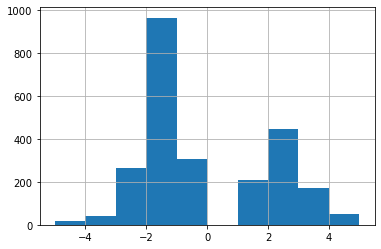

In [9]:
%matplotlib inline

afinn_wl_df['value'].hist()

# TextBlob

https://github.com/sloria/TextBlob

In [23]:
!pip install textblob

     |████████████████████████████████| 636 kB 1.4 MB/s eta 0:00:01


In [24]:
#### importing necessary libraries

from textblob import TextBlob

In [26]:
#### creating list sentences\


xyz = TextBlob("xyz is a good company and always value their employees.")

In [27]:
# generate textblob sentiment
xyz = xyz.sentiment

In [13]:
print(xyz)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [14]:
xyz1 = TextBlob("XYZ is not a good company and does not value their employees.")

In [15]:
print(xyz1.sentiment.polarity)

-0.35


In [28]:
TextBlob("I do not like this example at all, it is too boring").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [29]:
TextBlob("This was a helpful example but I would prefer another one").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

# Vader

https://github.com/cjhutto/vaderSentiment

In [4]:
## importing necessary libraries

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
### Validate vader lexicon

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mona/nltk_data...


True

In [32]:
### Instantiate Vader

sentiment = SentimentIntensityAnalyzer()


1)    positive sentiment: compound score >= 0.05
2)    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
3)    negative sentiment: compound score <= -0.05


In [19]:
### Evaluating sentiment scores

sentiment.polarity_scores("This is my car")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
sentiment.polarity_scores("The food here is good")

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [34]:
#Use of exclamation marks
sentiment.polarity_scores("The food here is good!")

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}

In [35]:
sentiment.polarity_scores("The food here is good!!")

{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5399}

In [36]:
sentiment.polarity_scores("The food here is good!!!")

{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.5826}

In [37]:
#use of capitalization
sentiment.polarity_scores("The food here is GOOD")

{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.5622}

In [42]:
sentiment.polarity_scores("The food here is extremely great")

{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.659}

In [39]:
sentiment.polarity_scores("The food here is marginally good")

{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}

In [44]:
# Conjuctions 
sentiment.polarity_scores("The food here is good but the service is horrible")

{'neg': 0.323, 'neu': 0.544, 'pos': 0.133, 'compound': -0.5859}

Emoticons

In [47]:
print(sentiment.polarity_scores("Make sure you :) or :D today!"))

{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.8633}


In [48]:
#Slangs

print(sentiment.polarity_scores("Today SUX!"))
print(sentiment.polarity_scores("Today only kinda sux! But I'll get by, lol"))

{'neg': 0.779, 'neu': 0.221, 'pos': 0.0, 'compound': -0.5461}
{'neg': 0.127, 'neu': 0.556, 'pos': 0.317, 'compound': 0.5249}
